## Assignment 2 - please answer the questions as thoroughly as possible, and provide detailed interpretation whenever possible

In [20]:
#import data: 
%cd /Users/josephgilbride/Desktop/Assignment2


/Users/josephgilbride/Desktop/Assignment2


In [297]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("banklist.csv")
df.head()
#print(len(df))

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,21-Feb-18
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,21-Feb-18
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


## Question 1 (20 points)

In [44]:
#Look at the data set: First, make sure there are no missing values in
#any of the categorical columns.If there are, replace them with
#a 'M' value. Then, consider that Acquiring Institution column is the institution that holds various banks.
#What are the top 4 acquiring institutions?

In [298]:
#Create pivot table w/ count of banks

df_pivot = pd.pivot_table(df,index=["Acquiring Institution"], values = ["Bank Name"], aggfunc='count')

#Sort high to low

q1 = df_pivot.sort_values(by="Bank Name", ascending = False)

#Display answer

q1.head(5)

,Bank Name
Acquiring Institution,
No Acquirer,31
State Bank and Trust Company,12
First-Citizens Bank & Trust Company,11
Ameris Bank,10
U.S. Bank N.A.,9


In [110]:
#How many city names start with the letter 'A' and how many don't? Use the str vectorized series attribute

In [319]:
#Create array w/ unique city values

cities = pd.unique(df["City"])

#Create series, count 'A' cities, convert to dataframe

q1a = pd.Series(cities)
q1a = q1a.str.startswith('A')
q1a = q1a.value_counts()
q1a2 = pd.DataFrame(q1a)

#Display answer

q1a2.columns = ['count']
print("There are ", q1a2.at[True, 'count'], " cities that begin with the letter 'A'.")
print("There are ", q1a2.at[False, 'count'], "cities that do not begin with the letter 'A'.")

There are  19  cities that begin with the letter 'A'.
There are  407 cities that do not begin with the letter 'A'.


In [320]:
#What are the cities whose names consist of 2 words and how many are there?

In [321]:
#Create array w/ unique city values

cities = pd.unique(df["City"]) 

#Count number of spaces in city name

space = str(' ')
countspace = [] 
for city in cities: 
    countspace.append(city.count(space))
countspace2 = pd.array(countspace) 
df2 = pd.DataFrame(data=[cities, countspace2])

#Find values with 1 space (two words)

twowords = df2.T[1] == 1 
answer = df2.T[twowords]

#Display answer

print("There are ", len(answer.index), " two word cities")
answer

There are  108  two word cities


,0,1
2,Saint Elmo,1
4,New Orleans,1
5,Cottonwood Heights,1
12,Peachtree City,1
14,San Juan,1
18,Palm Desert,1
19,Rising Sun,1
22,Fort Lauderdale,1
24,Bel Air,1
31,El Reno,1


## Question 2 (50 points)

In [ ]:
#use various apply and group by methods studied in class to obtain the city for each state corresponding to the smallest
#number of certificates (CERT column). Then, display only the city, state combinations along with the number of certificates
#(data frame with 3 columns) for which the Acquiring Institution contains 3 words (for this exercise, you can count symbols
#like & and others as words for each Acquiring Institution)

In [315]:
#Cities with smallest number of CERT

q2 = pd.pivot_table(df,index=["ST", "City"], values = ["CERT"])
q2a = q2.sort_values(by="CERT", ascending = True)
q2b = q2a.groupby('ST').idxmin()

q2b

,CERT
ST,
AL,"(AL, Montgomery)"
AR,"(AR, Mulberry)"
AZ,"(AZ, Gilbert)"
CA,"(CA, Merced)"
CO,"(CO, Colorado Springs)"
CT,"(CT, Stamford)"
FL,"(FL, Immokalee)"
GA,"(GA, Clarkesville)"
HI,"(HI, Honolulu)"


In [317]:
#Institutions with 3 words#

#Slice dataframe

df1 = df.iloc[:,1:5]

#Count spaces in institution name & create column with value

space = str(' ')
countspace = [] 
for x in df1.iloc[:,3]: 
    countspace.append(x.count(space))
countspace
countspace2 = pd.DataFrame(countspace) 

#Concatenate dataframes

df2 = pd.concat([df1, countspace2], axis=1)

#Filter data from institutions with 2 spaces (three words)

threewords = df2.iloc[:,4]==2
answer = df2[threewords]

#Display answer

pivot = pd.pivot_table(answer,index=["Acquiring Institution", "ST", "City"], values = ["CERT"])
pivot

CERT
Acquiring Institution            ST City                       
1st United Bank                  FL Clearwater          57537.0
                                    Coral Gables        19040.0
                                    Miami               22846.0
Alerus Financial, N.A.           MN Oakdale             35074.0
                                 SD Sioux Falls         34103.0
American Momentum Bank           FL Apollo Beach        58056.0
                                    Sarasota            35244.0
Bank Leumi USA                   FL Boca Raton          26652.0
Bank Midwest, N.A.               CO Greeley              2994.0
                                    Greenwood Village   21132.0
Bank of Essex                    GA Loganville          16490.0
                                 MD Crofton             30763.0
Bank of Kansas                   KS Anthony              4614.0
Bank of Marin                    CA Napa                57855.0
Bank of Nevada                   NV Henderson           34820.0
Bank of Sullivan                 MO Sunrise Beach       27331.0
Bank of Upson                    GA Duluth              58104.0
Bay Bank, FSB                    MD Baltimore           35462.0
                                    Bel Air             32368.0
Bay Cities Bank                  FL Tampa               32251.0
CB&S Bank, Inc.                  TN Parsons             19849.0
Cache Valley Bank                UT Cottonwood Heights  35495.0
                                    Layton              35461.0
                                    Saint George        57087.0
Capital Bank, N.A.               NC Asheville           58701.0
                                 PA Boothwyn            31581.0
                                    Huntingdon Valley   34130.0
CertusBank, National Association GA Braselton           57928.0
                                    Franklin            57647.0
                                    Macon               57213.0
...                                                         ...
Tri Counties Bank                CA Nevada City         33983.0
Trustmark National Bank          MS Carthage            14273.0
Twin City Bank                   WA Longview            35156.0
U.S. Bank N.A.                   AZ Phoenix             32218.0
                                 CA Los Angeles         34659.0
                                    San Diego           23594.0
                                    San Francisco       30006.0
                                 IL Chicago             11677.0
                                    Lemont              35291.0
                                 TX Houston             18776.0
                                    Madisonville        33782.0
                                    Teague              25222.0
U.S. Bank, N.A.                  CA Newport Beach       30968.0
                                    Pomona              28344.0
                                 ID Ketchum             34396.0
                                 NM Taos                12261.0
                                 TN Knoxville           19869.0
Union Bank, N.A.                 CA San Rafael          33493.0
                                 WA Everett             22710.0
Union State Bank                 NY White Plains        26778.0
United Central Bank              IL Harvey              18659.0
United Community Bank            GA Fayetteville        35251.0
United Valley Bank               MN Hallock             16133.0
Urban Partnership Bank           IL Chicago             15640.0
Valley National Bank             NY New York            42583.5
Western State Bank               AZ Scottsdale          34527.0
Whidbey Island Bank              WA Arlington           35053.0
                                    Lynnwood            21521.0
Wilshire State Bank              CA Los Angeles         57332.0
Your Community Bank              KY Lexington           29594.0

[181 rows x 1 columns]

## Question 3 (30 points)

In [699]:
#finally, let us obtain a distribution of CERT column across all records. Then, let us subset the original data frame to 
#only consider records for which CERT is smaller than 10th percentile of the total. Then, for these records, use pivot table
#method to obtain the min, max, and average CERT for each ST combination for which the number of records is 
#more than 1. We will have index for 
#state, and then 4 columns: ST,min_CERT, max_CERT, mean_CERT for CERT (make sure
#you do not have a multi-level data frame! Finally, display a bar plot for the first 3 states in the resulting
#data frame: each of the 3 states will be on x axis, and the corresponding 3 summary statistics will be the 3 bars - stacked
#bar plot.

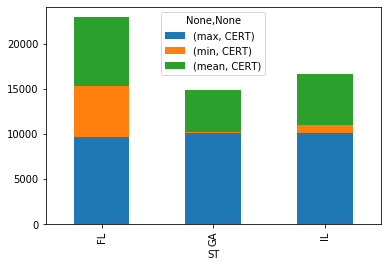

In [318]:
#Distribution

df3 = df.copy()
df3['CERT']=(df3['CERT'] / df3.sum(axis=0)['CERT']) * 100

#Below 10th percentile

q3 = df.sort_values(by="CERT", ascending = False)
q3a = q3.iloc[499:555,:]

#States with more than 1 record

q3b = pd.Series(q3a['ST'])
q3c = q3b.value_counts()>1
q3c[q3c]
states = ['IL', 'GA', 'KS', 'MO', 'OK', 'MN', 'TN', 'WI', 'OH', 'UT', 'FL']
answer = q3a[q3a['ST'].isin(states)]

#Calculation dataframe

answer2 = pd.pivot_table(answer,index=["ST"], values = ["CERT"], aggfunc=['max','min','mean'])
answer2

#Bar graph

answer2.iloc[0:3,:].plot(kind='bar', stacked=True)
